In [14]:
from time import time
import numpy as np
from sympy import *
from sympy.stats import *
from sympy.stats.crv_types import rv, SingleContinuousDistribution, _value_check

In [16]:
init_printing()

First, let's create a multivariate normal distribution

In [17]:
class MultivariateNormalDistribution(SingleContinuousDistribution):
        _argnames = ('μ', 'σ')

        def pdf(self, x):
            μ, σ = self.μ, self.σ
            N = self.σ.shape[0]
            return exp(- S.Half * (x - μ).T * (σ.inv()) * (x - μ)) / (sqrt((2*pi)**N * σ.det()))

def MultivariateNormal(name, μ, σ):
        return rv(name, MultivariateNormalDistribution, (μ, σ))

The dimension of the problem (things might start taking too much time for N >~ 5)

In [50]:
N = 2

Build the row vector of the means

In [51]:
mus = symbols(' '.join([f'μ{i}' for i in range(1, N+1)]))
mu = Matrix(mus)

mu

Build the NxN covariance matrix

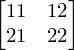

In [52]:
sigmas = symbols(' '.join([f'σ{i}{j}' for i in range(1, N+1) for j in range(1, N+1)]))
sigmas = np.array(sigmas).reshape(N,N)
sigma = Matrix(sigmas)

sigma

The points where to evaluate the normal density

In [53]:
ys = symbols(' '.join([f'y{i}' for i in range(1,N+1)]))
y = Matrix(ys)
y

Build the random variable X

In [54]:
X = MultivariateNormal('X', mu, sigma)

In [55]:
def loglike_calculated(X, y):
    loglike = log(prod(density(X)(y)))
    return expand_log(factor_terms(loglike), force=True)

def loglike_expected(X, y):
    # there are 3 terms
    t1 = - S.Half * (y - mu).T * sigma.inv() * (y - mu)
    t1 = t1[0,0] # because t1 is a 1x1 Matrix
    t1 = factor_terms(t1)
    
    t2 = - S.Half * log(det(sigma))
    
    t3 = - Integer(N)/2 * log(2*pi)
    t3 = expand_log(t3)
    
    return t1 + t2 + t3

If you really want to see them

In [56]:
# loglike_calculated(X, y)

In [57]:
# loglike_expected(X, y)

Are they the same?

In [58]:
loglike_calculated(X, y) - loglike_expected(X, y)

How much time does it take?

In [59]:
%timeit -r 1 -n 1 loglike_calculated(X, y)

103 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [60]:
%timeit -r 1 -n 1 loglike_expected(X, y)

112 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
